In [4]:
import requests
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from time import time

  
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Arc, Circle, ConnectionPatch, Rectangle

In [5]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"

In [6]:
match_url = base_url + "matches/{}/{}.json"
event_url = base_url + "events/{}.json"
comp_url = base_url + "competitions.json"
lineup_url = base_url + "lineups/{}.json"

match_id = 7580
match_id = 7586
comp_id = 43
season_id = 3

In [7]:
fra_arg = requests.get(event_url.format(match_id)).json()
fifawc = requests.get(match_url.format(comp_id,season_id)).json()
lineup = requests.get(lineup_url.format(match_id)).json()


In [8]:
class Match:
    def __init__(self, events, competition, match_id, lineup):
        self.events = events
        self.competition = competition
        self.match_id = match_id
        self.lineup = lineup

In [9]:
start = time()
testmatch = Match(fra_arg, fifawc, 7580, lineup)
end = time()
end - start

0.0

In [10]:
home_formation = testmatch.events[0]['tactics']['formation']
away_formation = testmatch.events[1]['tactics']['formation']

In [11]:
#testmatch.events[0]['tactics']['lineup']

In [73]:
_width = 80
_length  = 120
def build_pitch(traditional=True):
        """
        *this is an internal non-public method*
        build plt pitch figure 
        Parameters
        ----------
        fig_type : pitch type. Either compelete, right-half or left-half.
        Returns
        -------
        List of matplotlib patches which builds up the figure.
        """
        if traditional:
            pitch_color = 'green'
            line_color = 'white'
        else:
            pitch_color = False
            line_color = 'black'

        return [
                Rectangle((0, 0), width=_length, height=_width, fc = 'green',
                            fill=True, color='grey'),  # pitch
                Rectangle([0, 22.3], width=14.6, height=35.3,
                            fill=False),  # left penalty area
                Rectangle([105.4, 22.3], width=14.6, height=35.3,
                            fill=False),  # right penalty area
                ConnectionPatch([60, 0], [60, 80], "data", "data"),
                Rectangle([0, 32], width=4.9, height=16, fill=False),
                Rectangle([115.1, 32], width=4.9, height=16, fill=False),
                plt.Circle((60, 40), 9.1, color="black", fill=False),
                plt.Circle((60, 40), 0.33, color="black"),
                plt.Circle((9.7, 40), 0.33, color="black"),
                plt.Circle((110.3, 40), 0.33, color="black"),
                Arc((9.7, 40), height=16.2, width=16.2, angle=0,
                    theta1=310, theta2=50, color="black"),
                Arc((110.3, 40), height=16.2, width=16.2, angle=0,
                    theta1=130, theta2=230, color="black")
        ]




In [74]:
shapes = build_pitch()

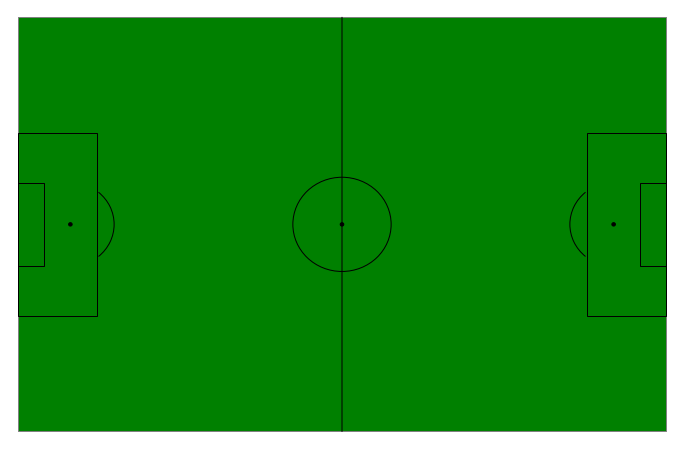

In [75]:
fig, axes = plt.subplots(figsize = (12,8))
axes.axis('off')  # this hides the x and y ticks
plt.ylim(-2, 82)
plt.xlim(-2, 122)
for i in shapes:
    axes.add_artist(i)
plt.show()